In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
def conduccion_1d(k,S,L,TA,TB,N):
    """
    Parameters
    ----------
    L: float
    L es la longitud del dominio.
    
    k: float
    k es la conductividad del material.
    
    S: float
    S es la fuente.
    
    TA: float
    TA es la condición de frontera a la izaquierda.
    
    TB: float
    TB es la condición de frontera a la derecha.
    
    N: int
    N es el número de nodos internos (grados de libertad).
    Return
    ------
    Al final esta función dibuja la solución
    """

    h = L / (N+1)
    T = np.zeros(N+2)
    b = np.zeros(N)
    A = np.zeros((N,N))

    T[0] = TA
    T[-1] = TB
    r = k / h**2
    b[:] = S / r
    b[0] += TA
    b[-1] += TB

    A[0,0] = 2
    A[0,1] = -1
    for i in range(1,N-1):
        A[i,i] = 2
        A[i,i+1] = -1
        A[i,i-1] = -1
    A[-1,-2] = -1
    A[-1,-1] = 2
    print("A=",A)

    T[1:N+1] = np.linalg.solve(A,b)
    print("T=",T)
    plt.plot(T, 'o-') 
    plt.show()

A= [[ 2. -1.  0.  0.]
 [-1.  2. -1.  0.]
 [ 0. -1.  2. -1.]
 [ 0.  0. -1.  2.]]
T= [ 200.  360.  520.  680.  840. 1000.]


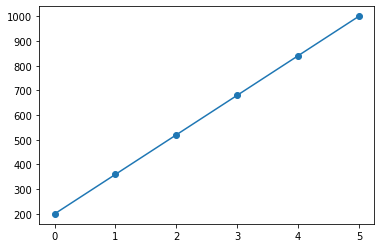

In [3]:
conduccion_1d(0.02, 0.0, 5.0, 200, 1000, 4)

In [4]:
w = widgets.interactive(conduccion_1d,
                       k = widgets.fixed(0.02),
                       S = widgets.FloatSlider(max=1.0, min=0.0, value=0, step=0.2),
                       L = widgets.fixed(5.0),
                       TA = widgets.fixed(200),
                       TB = widgets.fixed(1000),
                       N = widgets.IntSlider(max=10, min=4, value=4))
display(w)

interactive(children=(FloatSlider(value=0.0, description='S', max=1.0, step=0.2), IntSlider(value=4, descripti…